In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Data Set

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

### Parameter initialization

In [3]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### Define Optimizer

In [4]:
optimizer = torch.optim.SGD([W, b], lr=0.001)

### Train

In [5]:
epoch_num = 100000
W_, b_, cost_, epoch_ = [], [], [], []
for epoch in tqdm(range(epoch_num)):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    W_.append(W.item())
    b_.append(b.item())
    cost_.append(cost.item())
    epoch_.append(epoch+1)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:22<00:00, 4435.04it/s]


### Result

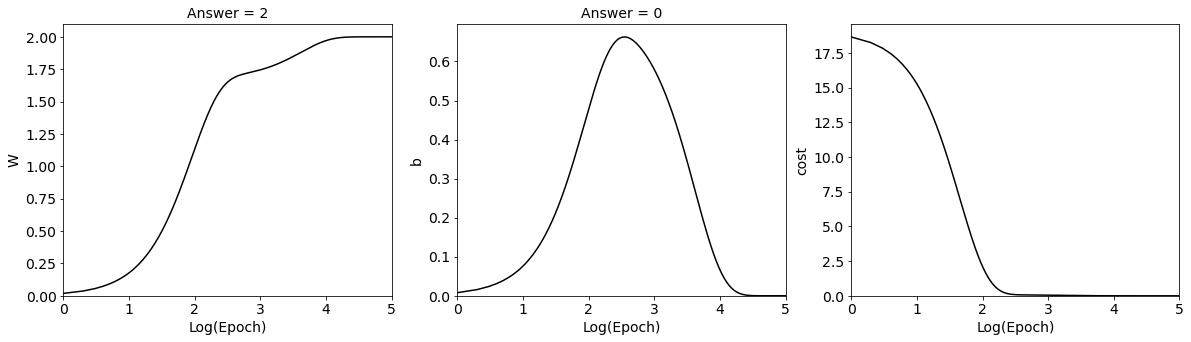

In [6]:
fontsize=14
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title('Answer = 2', fontsize=fontsize)
plt.plot(np.log10(epoch_), W_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('W', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.ylim(bottom=0)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.subplot(1, 3, 2)
plt.title('Answer = 0', fontsize=fontsize)
plt.plot(np.log10(epoch_), b_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('b', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.ylim(bottom=0)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.subplot(1, 3, 3)
plt.plot(np.log10(epoch_), cost_, color='k')
plt.xlabel('Log(Epoch)', fontsize=fontsize)
plt.ylabel('cost', fontsize=fontsize)
plt.xlim(0, np.log10(epoch_num))
plt.ylim(bottom=0)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

plt.show()